In [1]:
# 필요한 패키지 참조

from pandas import read_excel, DataFrame, pivot_table, to_datetime, concat
import numpy as np
import sys
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime,timedelta 
import pandas as pd

In [2]:
origin = read_excel('C:/Users/J/Desktop/미세먼지data/필수데이터_전처리코드/4.지하철이용객수(2208~2308).xlsx')
origin

,Unnamed: 0,사용일자,노선명,역명,하차총승객수,사용일자변경
0,127012,20220801,중앙선,도심,1636,2022-08-01
1,127013,20220801,경원선,도봉,5113,2022-08-01
2,127014,20220801,경원선,도봉산,3864,2022-08-01
3,127015,20220801,경원선,망월사,6759,2022-08-01
4,127016,20220801,경원선,회룡,10795,2022-08-01
...,...,...,...,...,...,...
240408,18908,20230831,일산선,화정,18883,2023-08-31
240409,18909,20230831,일산선,원당,11312,2023-08-31
240410,18910,20230831,일산선,삼송,20290,2023-08-31
240411,18911,20230831,일산선,지축,0,2023-08-31


In [3]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

In [4]:
df = origin[['사용일자변경','노선명','역명','하차총승객수']]
df = df.query('노선명=="1호선" or 노선명=="2호선" or 노선명=="3호선" or 노선명=="4호선" or 노선명=="5호선" or 노선명=="6호선" or 노선명=="7호선" or 노선명=="8호선" or 노선명=="9호선"')
#
# 하차총승객수 평균 14756 -> 15000
df2 = df[df['사용일자변경']=='20230107']
df2.describe()

,사용일자변경,하차총승객수
count,298,298.000000
mean,2023-01-07 00:00:00,11528.895973
min,2023-01-07 00:00:00,0.000000
25%,2023-01-07 00:00:00,4965.750000
50%,2023-01-07 00:00:00,8529.000000
75%,2023-01-07 00:00:00,13989.750000
max,2023-01-07 00:00:00,85772.000000
std,NaN,10666.613846


In [5]:
# 도수분포표 그리기

hist, bins = np.histogram(df2['하차총승객수'],10)
# print(hist)
# print(bins)

s = len(hist)
for i in range(0,s):
    if i+1 <s:
        tpl = '%d이상 %d미만: %d개'
    else:
        tpl = '%d이상 %d미만: %d개'

    print(tpl % (bins[i],bins[i+1],hist[i]))

0이상 8577미만: 149개
8577이상 17154미만: 96개
17154이상 25731미만: 30개
25731이상 34308미만: 9개
34308이상 42886미만: 8개
42886이상 51463미만: 2개
51463이상 60040미만: 1개
60040이상 68617미만: 1개
68617이상 77194미만: 1개
77194이상 85772미만: 1개


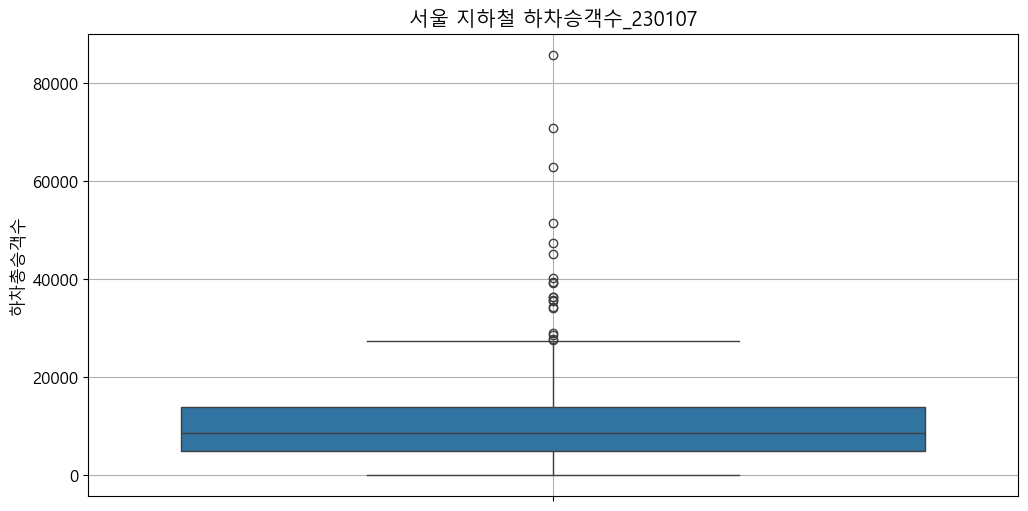

In [7]:
# 상자그림
plt.figure()
sns.boxplot(data=df2['하차총승객수'])
plt.grid()
plt.title("서울 지하철 하차승객수_230107")
plt.show()
plt.close()

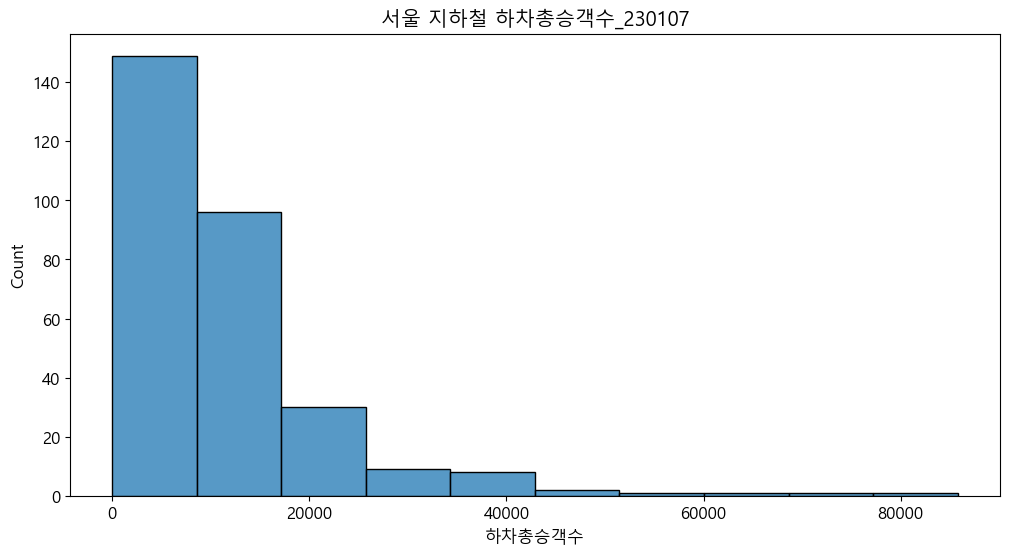

In [8]:
sns.histplot(data=df2, x='하차총승객수', bins=10)
plt.title("서울 지하철 하차총승객수_230107")
plt.show()
plt.close()

In [ ]:
#결측치 확인
empty = df.isnull()
empty.sum()

사용일자변경    0
노선명       0
역명        0
하차총승객수    0
dtype: int64

In [ ]:
#하차총승객수가 최대와 최소의 차이가 평균의 +-5%가 넘지 않는 범위 추출


df3 = df2.query('하차총승객수 >= 8075 and 하차총승객수 <= 8925')
#df3.to_excel('지하역사공기질_0107.xlsx')
df3
# df3['자치구']=['중구','성동구','은평구','강남구','성북구','중구','종로구','강동구','강서구']
# df3['외부미세먼지']=['99','0','89','87','89','99','102','97','87']
# df3['지하역사미세먼지']=['113','0','128','88','0','98','98','168','76']
# df3
# df3['지하역사미세먼지']=['99','0','89','87','89','99','102','97','87']

# df3.sort_values('역명')

,사용일자변경,노선명,역명,하차총승객수
96455,2023-01-07,3호선,녹번,8898
96463,2023-01-07,3호선,약수,8832
96527,2023-01-07,5호선,마포,8323
96528,2023-01-07,5호선,공덕,8105
96570,2023-01-07,6호선,새절(신사),8242
96574,2023-01-07,6호선,마포구청,8241
96598,2023-01-07,6호선,석계,8870
96605,2023-01-07,7호선,마들,8469
96607,2023-01-07,7호선,중계,8377
96609,2023-01-07,7호선,공릉(서울과학기술대),8605


In [ ]:


df4 = df3[['자치구','외부미세먼지']]
df4['외부미세먼지']=df4['외부미세먼지'].astype('int')
df4

# 이상치 0 제거

df5 = df4.drop(df4.index[1])
df5.describe()
# 1월 7일 유동인구 비슷한 역들의 외부 미세먼지 평균 93  12월~3월 평균 25 대비 272% 오름



C:\Users\J\AppData\Local\Temp\ipykernel_22072\2168958084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['외부미세먼지']=df4['외부미세먼지'].astype('int')


,외부미세먼지
count,8.000000
mean,93.625000
std,6.209152
min,87.000000
25%,88.500000
50%,93.000000
75%,99.000000
max,102.000000


In [ ]:
# 위 역들의 지하역사 미세먼지 평균



df6 = df3[['자치구','지하역사미세먼지']]
df6['지하역사미세먼지']=df6['지하역사미세먼지'].astype('int')
df6

# 이상치 0 제거

df7 = df6.drop(df6.index[1])
df8 = df7.drop(df7.index[3])
df8.describe()
# 1월 7일 유동인구 비슷한 역들의 지하역사 미세먼지 평균 109  12월~3월 평균 44 대비 147% 오름



C:\Users\J\AppData\Local\Temp\ipykernel_22072\2401472074.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['지하역사미세먼지']=df6['지하역사미세먼지'].astype('int')


,지하역사미세먼지
count,7.000000
mean,109.857143
std,30.618233
min,76.000000
25%,93.000000
50%,98.000000
75%,120.500000
max,168.000000
